# Cloud Botany, see [paper]() and [instructions](https://howto.eurec4a.eu/botany_dales.html)

Noticing one must `pip install intake xarray intake-xarray zarr pydap s3fs requests ipfsspec` 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
import xarray as xr

In [2]:
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/eurec4a/eurec4a-intake/master/catalog.yml")

In [3]:
list(cat)

['radiosondes',
 'barbados',
 'Atalante',
 'ATR',
 'BOREAL',
 'CU-RAAVEN',
 'Caravela',
 'HALO',
 'Humpback',
 'IFM03',
 'IFM09',
 'IFM12',
 'Kracken',
 'Melonhead',
 'mini-MPCK',
 'MPCK-plus',
 'MS-Merian',
 'NTAS',
 'Omura',
 'P3',
 'QuadCopter',
 'RonBrown',
 'SD-1026',
 'SD-1060',
 'SD-1061',
 'SD-1063',
 'SD-1064',
 'Skywalker07',
 'Skywalker10',
 'Skywalker12',
 'SVP-B-4101696',
 'SVP-B-4101697',
 'SVP-B-4101698',
 'SVP-B-4101699',
 'SVP-B-4101780',
 'SVP-BRST-4402505',
 'SVP-BRST-4402506',
 'SVP-BRST-4402507',
 'SVP-BRST-4402508',
 'SVP-BRST-6203717',
 'SVP-BS-4101757',
 'SVP-BS-4101758',
 'SVP-BSW-3101569',
 'SVP-BSW-3101570',
 'SVP-BSW-3101571',
 'SVP-BSW-3101572',
 'SVP-BSW-3101573',
 'SVP-BSW-3101574',
 'SVP-BSW-3101575',
 'SVP-BSW-3101576',
 'SVP-BSW-3101577',
 'SVP-BSW-3101578',
 'SWIFT16',
 'SWIFT17',
 'SWIFT22',
 'SWIFT23',
 'SWIFT24',
 'SWIFT25',
 'TO',
 'WG245',
 'WG247',
 'c3ontext',
 'dropsondes',
 'satellites',
 'simulations',
 'radiative_profiles',
 'Meteor']

In [4]:
# Satellite data from EUREC4A: some other project to look at that ONE MINUTE RES!
# sat = cat.satellites.GOES16.latlongrid.to_dask()
# sat.isel(time=100).plot()     # lat: 2640 lon: 2200 time: 1440 = 1 minute resolution!!

In [5]:
botany_cat = cat.simulations.DALES.botany

In [6]:
botany_cat.dx100m.nx1536

nx1536:
  args:
    path: https://raw.githubusercontent.com/eurec4a/eurec4a-intake/master/Simulations/DALES/botany_dx100m_nx1536.yaml
  description: 'Cloud botany: DALES LES ensemble with varied forcings at 100m grid
    spacing, 153.6 km domain'
  driver: intake.catalog.local.YAMLFileCatalog
  metadata:
    catalog_dir: https://raw.githubusercontent.com/eurec4a/eurec4a-intake/master/Simulations/DALES


In [7]:
import pandas as pd
varied_parameters = ['member','thls', 'u0', 'qt0', 'qt_lambda', 'thl_Gamma', 'wpamp', 'dudz', 'location']
parameters = cat.simulations.DALES.botany.dx100m.nx1536.parameters.read()
df_parameters = pd.DataFrame.from_records(parameters)[varied_parameters]
df_parameters

,member,thls,u0,qt0,qt_lambda,thl_Gamma,wpamp,dudz,location
0,1,298.5,-10.0,0.01425,1850.0,5.0,-0.00085,0.0022,center
1,2,297.5,-15.0,0.01350,1200.0,4.5,-0.00350,0.0022,corner
2,3,297.5,-15.0,0.01350,1200.0,4.5,0.00180,0.0022,corner
3,4,297.5,-15.0,0.01350,1200.0,5.5,-0.00350,0.0022,corner
4,5,297.5,-15.0,0.01350,1200.0,5.5,0.00180,0.0022,corner
...,...,...,...,...,...,...,...,...,...
98,99,298.5,-10.0,0.01425,2200.0,5.0,-0.00085,0.0022,sweep qt_lambda
99,100,298.5,-10.0,0.01425,2500.0,5.0,-0.00085,0.0022,sweep qt_lambda
100,101,298.5,-10.0,0.01425,3000.0,5.0,-0.00085,0.0022,sweep qt_lambda
101,102,298.5,-10.0,0.01350,1850.0,5.0,-0.00085,0.0022,sweep qt0


In [8]:
df_parameters.iloc[ [2,9,32,33,34,35,36] ]

,member,thls,u0,qt0,qt_lambda,thl_Gamma,wpamp,dudz,location
2,3,297.5,-15.0,0.0135,1200.0,4.5,0.0018,0.0022,corner
9,10,297.5,-15.0,0.0150,1200.0,4.5,-0.0035,0.0022,corner
32,33,297.5,-5.0,0.0150,2500.0,5.5,0.0018,0.0022,corner
33,34,299.5,-15.0,0.0135,1200.0,4.5,-0.0035,0.0022,corner
34,35,299.5,-15.0,0.0135,1200.0,4.5,0.0018,0.0022,corner
35,36,299.5,-15.0,0.0135,1200.0,5.5,-0.0035,0.0022,corner
36,37,299.5,-15.0,0.0135,1200.0,5.5,0.0018,0.0022,corner


In [9]:
import xarray as xr

ds_profiles = botany_cat.dx100m.nx1536['profiles'].to_dask()
ds_profiles

<xarray.Dataset>
Dimensions:    (member: 103, time: 720, zt: 175, zm: 175)
Coordinates:
  * member     (member) int32 1 2 3 4 5 6 7 8 9 ... 96 97 98 99 100 101 102 103
  * time       (time) datetime64[ns] 2020-02-01T00:05:00 ... 2020-02-03T12:00:00
  * zm         (zm) float32 0.0 15.0 30.0 45.3 ... 6.772e+03 6.854e+03 6.938e+03
  * zt         (zt) float32 7.5 22.5 37.65 ... 6.813e+03 6.896e+03 6.98e+03
Data variables: (12/102)
    cfrac      (member, time, zt) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    cs         (member, time, zt) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    dvrmn      (member, time, zt) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    lwd        (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    lwdca      (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    lwu        (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    ...         ...
    wthlr      (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    wthls      (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    wthlt      (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    wthvr      (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    wthvs      (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    wthvt      (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
Attributes:
    Author:   
    Source:   DALES 4.2 git: v4.3-108-gca69cb
    history:  Created on 20220520 at 213340.423
    title:    profiles.001.nc

In [10]:
ds_profiles.wthvr.isel(time=slice(None, None, 10), zm=slice(None, None, 5))

<xarray.DataArray 'wthvr' (member: 103, time: 72, zm: 35)>
dask.array<getitem, shape=(103, 72, 35), dtype=float32, chunksize=(32, 26, 35), chunktype=numpy.ndarray>
Coordinates:
  * member   (member) int32 1 2 3 4 5 6 7 8 9 ... 95 96 97 98 99 100 101 102 103
  * time     (time) datetime64[ns] 2020-02-01T00:05:00 ... 2020-02-03T11:15:00
  * zm       (zm) float32 0.0 76.21 156.2 ... 5.842e+03 6.216e+03 6.609e+03
Attributes:
    longname:  Resolved buoyancy flux
    units:     Km/s

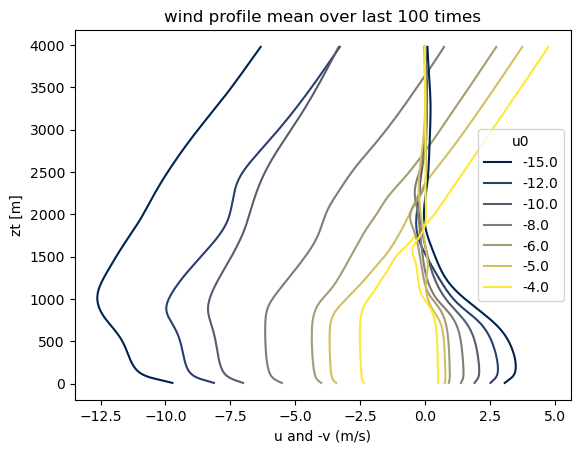

In [24]:
# Examplesfrom the HowTo https://howto.eurec4a.eu/botany_dales.html#

from cycler import cycler

fig = plt.figure()
ax = plt.gca()
ax.set_prop_cycle(cycler(color=plt.cm.cividis(np.linspace(0, 1, 7))))

# Add u0 to the profiles output
ds_u = ds_profiles.assign(df_parameters[['member','u0']].set_index('member').to_xarray())

# Plot mean cloud fraction profiles grouped by surface wind over the last 100 time steps of all simulations
ds_u[['cfrac','u','v','u0']].isel(time=slice(-100,-1)).sel(zt = slice(0,4000)).mean(dim='time').\
       groupby('u0').mean()['u'].plot.line(ax=ax, y='zt')
(-ds_u[['cfrac','u','v','u0']].isel(time=slice(-100,-1)).sel(zt = slice(0,4000)).mean(dim='time').\
       groupby('u0').mean()['v']).plot.line(ax=ax, y='zt')
plt.xlabel('u and -v (m/s)')
plt.title('wind profile mean over last 100 times')
plt.show()

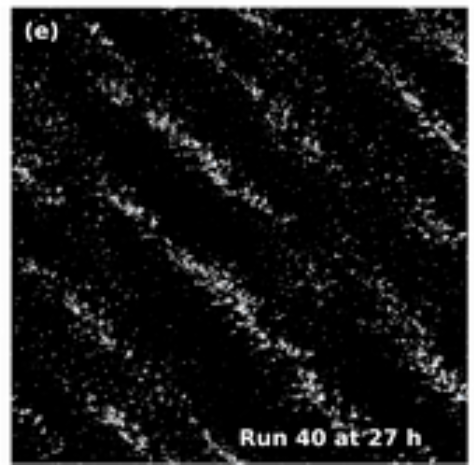

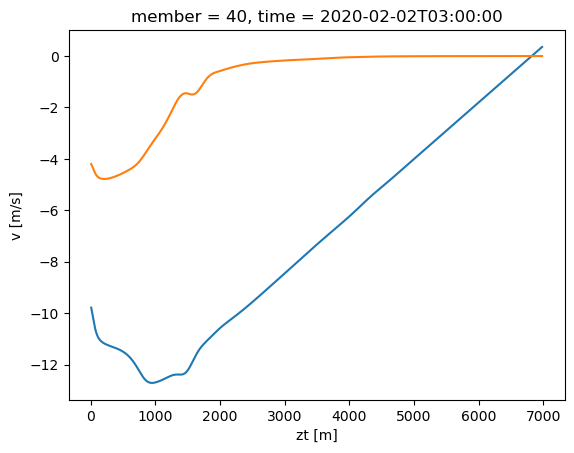

In [73]:
# Figure 8 in the paper has 45 degree cloud bands, why? 
# Shear profile is not at 45 or anything

ds_u.u.sel(time='2020-02-02T03:00', member=40).plot()
ds_u.v.sel(time='2020-02-02T03:00', member=40).plot();

## Save the profile data to local disk

In [11]:
ds_profiles.wthvr.isel(time=slice(None, None, 10), zm=slice(None, None, 5))\
            .to_netcdf('/Users/bmapes/Box/EvolutionaryConvection/CloudBotany_profiles_103x72x35.nc')

-------------------
# 2D fields 

In [12]:
ds_2D = botany_cat.dx100m.nx1536['2D'].to_dask()
ds_2D

# check some problem cases 
# 1,9  31,11  34,8  47,8  61,3  69,4  74,7  81,4  83,4  86,4  91,5  


<xarray.Dataset>
Dimensions:    (member: 103, time: 720, yt: 1536, xt: 1536)
Coordinates:
  * member     (member) int32 1 2 3 4 5 6 7 8 9 ... 96 97 98 99 100 101 102 103
  * time       (time) datetime64[ns] 2020-02-01T00:05:00 ... 2020-02-03T12:00:00
  * xt         (xt) float64 50.0 150.0 250.0 ... 1.534e+05 1.534e+05 1.536e+05
  * yt         (yt) float64 50.0 150.0 250.0 ... 1.534e+05 1.534e+05 1.536e+05
Data variables:
    capemax    (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    cinmax     (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    cldtop     (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    hinvsrf    (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    hmix       (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    lwp        (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    rwp        (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    surfprec   (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    thetavmix  (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    twp        (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    umix       (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    vmix       (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu May 26 04:40:08 2022: cdo -f nc4 -z zip_6 -r -O collgri...
    title:        000/cape.x000y000.001.nc

In [72]:
ds_u

<xarray.Dataset>
Dimensions:    (member: 103, time: 720, zt: 175, zm: 175)
Coordinates:
  * member     (member) int64 1 2 3 4 5 6 7 8 9 ... 96 97 98 99 100 101 102 103
  * time       (time) datetime64[ns] 2020-02-01T00:05:00 ... 2020-02-03T12:00:00
  * zm         (zm) float32 0.0 15.0 30.0 45.3 ... 6.772e+03 6.854e+03 6.938e+03
  * zt         (zt) float32 7.5 22.5 37.65 ... 6.813e+03 6.896e+03 6.98e+03
Data variables: (12/103)
    cfrac      (member, time, zt) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    cs         (member, time, zt) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    dvrmn      (member, time, zt) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    lwd        (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    lwdca      (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    lwu        (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    ...         ...
    wthls      (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    wthlt      (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    wthvr      (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    wthvs      (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    wthvt      (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    u0         (member) float64 -10.0 -15.0 -15.0 -15.0 ... -10.0 -10.0 -10.0
Attributes:
    Author:   
    Source:   DALES 4.2 git: v4.3-108-gca69cb
    history:  Created on 20220520 at 213340.423
    title:    profiles.001.nc

In [84]:
mydata = ds_u[['wthvt','ql','ql2r','cfrac','w2r']]
mydata

<xarray.Dataset>
Dimensions:  (member: 103, time: 720, zm: 175, zt: 175)
Coordinates:
  * member   (member) int64 1 2 3 4 5 6 7 8 9 ... 95 96 97 98 99 100 101 102 103
  * time     (time) datetime64[ns] 2020-02-01T00:05:00 ... 2020-02-03T12:00:00
  * zm       (zm) float32 0.0 15.0 30.0 45.3 ... 6.772e+03 6.854e+03 6.938e+03
  * zt       (zt) float32 7.5 22.5 37.65 52.95 ... 6.813e+03 6.896e+03 6.98e+03
Data variables:
    wthvt    (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    ql       (member, time, zt) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    ql2r     (member, time, zt) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    cfrac    (member, time, zt) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
    w2r      (member, time, zm) float32 dask.array<chunksize=(32, 256, 175), meta=np.ndarray>
Attributes:
    Author:   
    Source:   DALES 4.2 git: v4.3-108-gca69cb
    history:  Created on 20220520 at 213340.423
    title:    profiles.001.nc

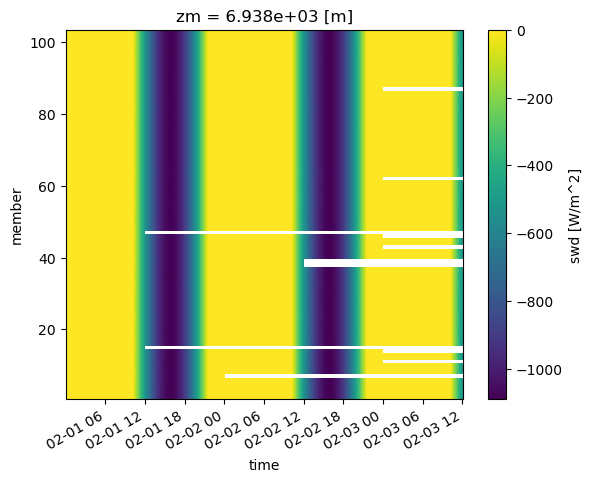

In [81]:
ds_u.swd.isel(zm = -1).plot()

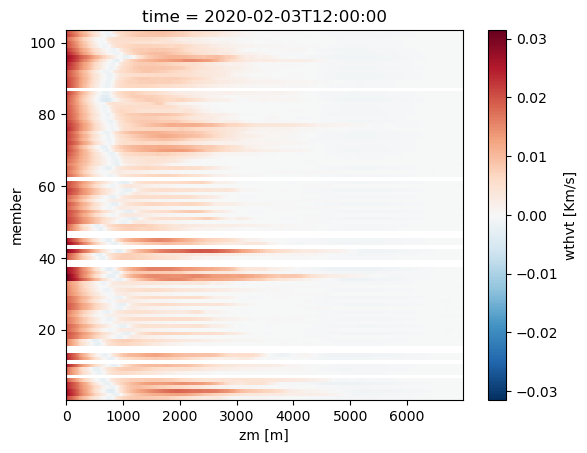

In [45]:
# Plot mean buoyancy flux profiles at last time step 
ds_u['wthvt'].isel(time=-1).plot()

In [50]:
bfluxts = ds_u['wthvt'].mean(dim='zm')
bfluxts

<xarray.DataArray 'wthvt' (member: 103, time: 720)>
dask.array<mean_agg-aggregate, shape=(103, 720), dtype=float32, chunksize=(32, 256), chunktype=numpy.ndarray>
Coordinates:
  * member   (member) int64 1 2 3 4 5 6 7 8 9 ... 95 96 97 98 99 100 101 102 103
  * time     (time) datetime64[ns] 2020-02-01T00:05:00 ... 2020-02-03T12:00:00

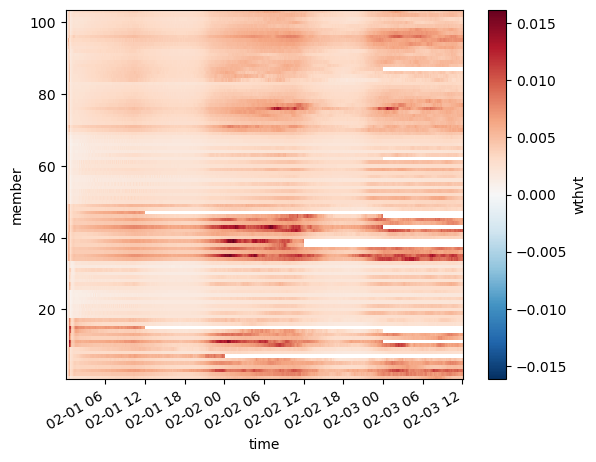

In [51]:
bfluxts.plot()

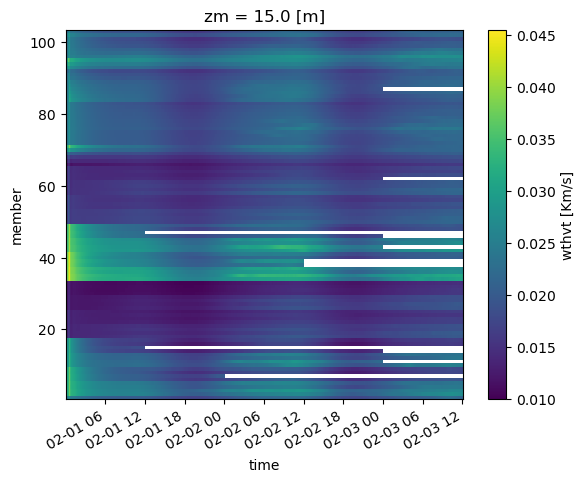

In [53]:
bds_u['wthvt'].isel(zm=1).plot()

In [71]:
bflux0ts = ds_u['wthvt'].isel(zm=1)
bflux0ts

<xarray.DataArray 'wthvt' (member: 103, time: 720)>
dask.array<getitem, shape=(103, 720), dtype=float32, chunksize=(32, 256), chunktype=numpy.ndarray>
Coordinates:
  * member   (member) int64 1 2 3 4 5 6 7 8 9 ... 95 96 97 98 99 100 101 102 103
  * time     (time) datetime64[ns] 2020-02-01T00:05:00 ... 2020-02-03T12:00:00
    zm       float32 15.0
Attributes:
    longname:  Total buoyancy flux
    units:     Km/s

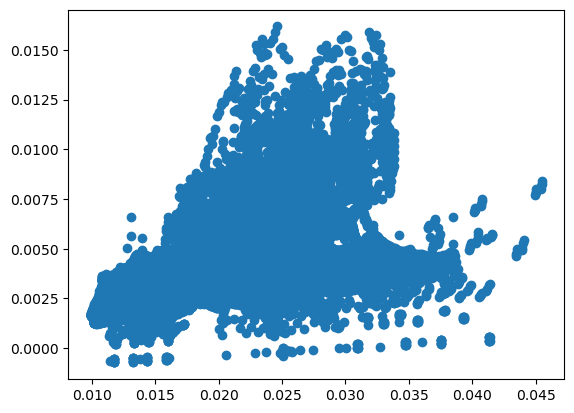

In [54]:
# Wonder if the surface value is a good proxy for the vertical mean? 
plt.scatter( ds_u['wthvt'].isel(zm=1), bfluxts )

In [65]:
# Flatten the coordinate arrays to 1D arrays
mem_flat = ds_u['member'].values.flatten()

# Flatten the 2D data array to a 1D array
data_flat = ds_u['wthvt'].values.flatten()

In [70]:
mem_flat.shape

(103,)

In [69]:
data_flat.shape

(12978000,)

In [ ]:
# Make a time series 

In [ ]:
# could make a time array (minus initial) for size s
stime = =xr.broadcast( ds_u['time']-min(ds_u['time']) )
plt.scatter( ds_u['wthvt'].isel(zm=1), bfluxts, c=xr.broadcast(ds_u['member']), s=stime ) #, c=ds_u['member'] )

In [ ]:
x2d, y2d = xr.broadcast(ds['x'], ds['y'])

# 2D plots 

For the last time (60 hours after initialisation) for the “center” of the hypercube of simulations (member 1), we might visualise the vertically integrated total specific humidity (the total water path twp), the cloud-top height (cldtop), the rain-water path (rwp) and an indicator for the extent of cold pools (the local mixed-layer height, hmix), as follows. 

To compute cloud scene morpho metrics, follow [this repo](https://github.com/martinjanssens/cloudmetrics) and do 

`import cloudmetrics`

`iorg = cloudmetrics.iorg(cloud_mask=da_cloudmask)`

In [34]:
ds2D = botany_cat.dx100m.nx1536['2D'].to_dask() #.sel(member=1).isel(time=-1)
ds2D

<xarray.Dataset>
Dimensions:    (member: 103, time: 720, yt: 1536, xt: 1536)
Coordinates:
  * member     (member) int32 1 2 3 4 5 6 7 8 9 ... 96 97 98 99 100 101 102 103
  * time       (time) datetime64[ns] 2020-02-01T00:05:00 ... 2020-02-03T12:00:00
  * xt         (xt) float64 50.0 150.0 250.0 ... 1.534e+05 1.534e+05 1.536e+05
  * yt         (yt) float64 50.0 150.0 250.0 ... 1.534e+05 1.534e+05 1.536e+05
Data variables:
    capemax    (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    cinmax     (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    cldtop     (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    hinvsrf    (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    hmix       (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    lwp        (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    rwp        (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    surfprec   (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    thetavmix  (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    twp        (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    umix       (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
    vmix       (member, time, yt, xt) float32 dask.array<chunksize=(1, 32, 256, 256), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu May 26 04:40:08 2022: cdo -f nc4 -z zip_6 -r -O collgri...
    title:        000/cape.x000y000.001.nc

In [ ]:
# Merge into one dataset
# mydata2 = xr.merge([mydata, ds_2D[ ['lwp','surfprec'] ]], compat='override')

mydata2d = ds2D[ ['lwp','surfprec','twp'] ].isel(time=slice(None, None, 40))\
                                    .isel(xt=slice(None, None, 6))\
                                    .isel(yt=slice(None, None, 6)) 
mydata2d

In [ ]:
mydata.to_netcdf('/Users/bmapes/Box/EvolutionaryConvection/CloudBotany_profiles.nc')

In [107]:
103*18*256*256*8/1e6 # Megabytes 

972.029952

In [ ]:
#exps: 103 time: 18  yt: 256  xt: 256

mydata2d.to_netcdf('/Users/bmapes/Box/EvolutionaryConvection/CloudBotany_patterns256_twp_UMwifi.nc')

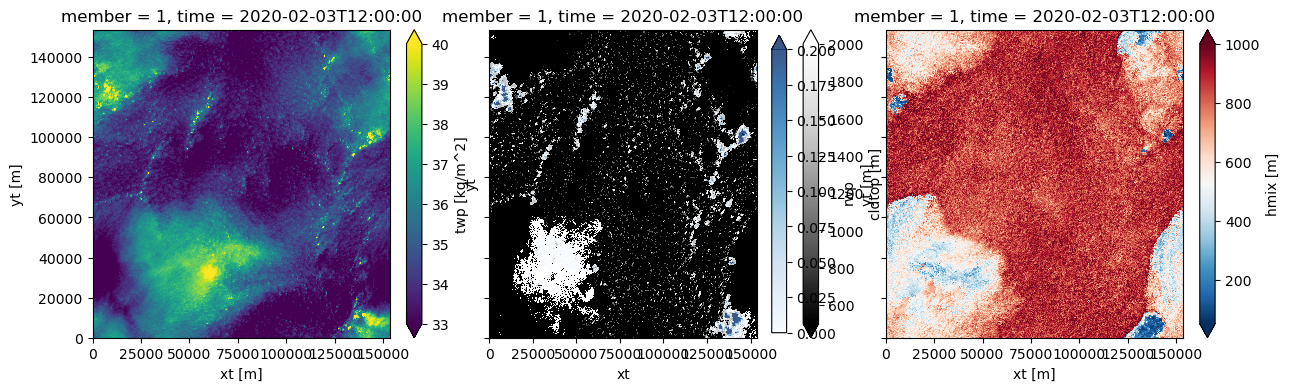

In [22]:
# Some example plots of one member at one time, from the example given at EUREC4a site
ds_2D = ds2D.sel(member=1).isel(time=-1)

cb_kw = {'fraction' : 0.05}
fig, axs = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(14.5,4))

# Total water path
ds_2D['twp'].plot(ax=axs[0], vmin=33 ,vmax=40, cbar_kwargs=cb_kw)

# Cloud-top height and rain water path
ds_2D['cldtop'].plot(ax=axs[1],cmap='Greys_r', vmin=500, vmax=2000, cbar_kwargs=cb_kw)
rwp_masked = xr.where(ds_2D['rwp'] > 1e-5, ds_2D['rwp'], np.nan)
rwp_masked.plot(ax=axs[1], cmap='Blues', vmin=0, vmax=0.2, alpha=0.8, cbar_kwargs=cb_kw)

# Mixed-layer height
ds_2D['hmix'].plot(ax=axs[2],cmap='RdBu_r', vmin=50, vmax=1000, cbar_kwargs=cb_kw)

plt.show()

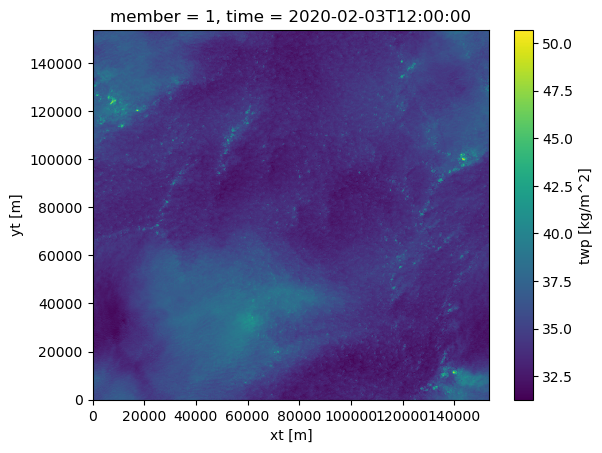

In [26]:
ds_2D.twp.plot()

In [28]:
ds_ts = botany_cat.dx100m.nx1536['timeseries'].to_dask()
ds_ts

<xarray.Dataset>
Dimensions:  (member: 103, time: 3600)
Coordinates:
  * member   (member) int32 1 2 3 4 5 6 7 8 9 ... 95 96 97 98 99 100 101 102 103
  * time     (time) datetime64[ns] 2020-02-01T00:01:00 ... 2020-02-03T12:00:00
Data variables: (12/22)
    cfrac    (member, time) float32 dask.array<chunksize=(103, 3600), meta=np.ndarray>
    lmax     (member, time) float32 dask.array<chunksize=(103, 3600), meta=np.ndarray>
    lwp_bar  (member, time) float32 dask.array<chunksize=(103, 3600), meta=np.ndarray>
    lwp_max  (member, time) float32 dask.array<chunksize=(103, 3600), meta=np.ndarray>
    obukh    (member, time) float32 dask.array<chunksize=(103, 3600), meta=np.ndarray>
    qtstr    (member, time) float32 dask.array<chunksize=(103, 3600), meta=np.ndarray>
    ...       ...
    wthetav  (member, time) float32 dask.array<chunksize=(103, 3600), meta=np.ndarray>
    z0       (member, time) float32 dask.array<chunksize=(103, 3600), meta=np.ndarray>
    zb       (member, time) float32 dask.array<chunksize=(103, 3600), meta=np.ndarray>
    zc_av    (member, time) float32 dask.array<chunksize=(103, 3600), meta=np.ndarray>
    zc_max   (member, time) float32 dask.array<chunksize=(103, 3600), meta=np.ndarray>
    zi       (member, time) float32 dask.array<chunksize=(103, 3600), meta=np.ndarray>
Attributes:
    Author:   
    Source:   DALES 4.2 git: v4.3-108-gca69cb
    history:  Created on 20220520 at 213340.345
    title:    tmser.001.nc

Text(0.5, 1.0, 'Time series of surface theta-v flux')

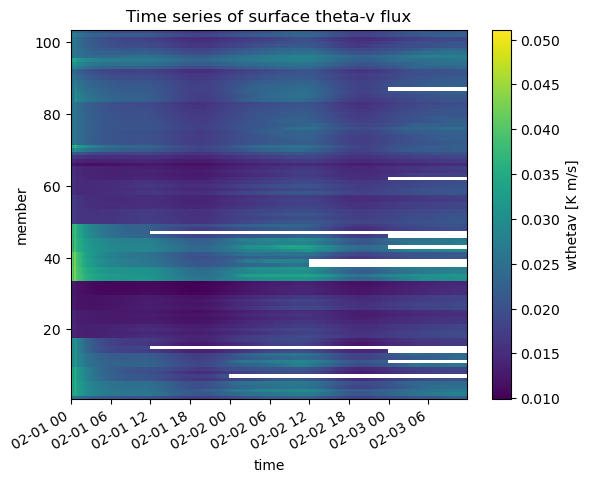

In [32]:
ds_ts.wthetav[:,::10].plot()
plt.title('Time series of surface theta-v flux')

Text(0.5, 1.0, 'Cumulation of surface theta-v flux: a version of age')

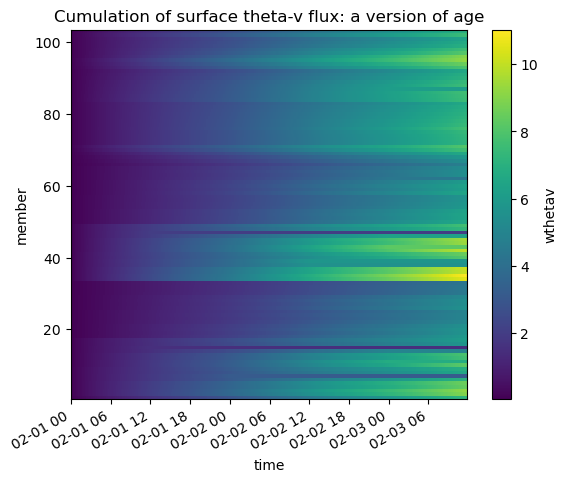

In [36]:
ds_ts.wthetav[:,::10].cumsum(axis=1).plot()
plt.title('Cumulation of surface theta-v flux: a version of age')

In [39]:
ds_crossxy = botany_cat.dx100m.nx1536['cross_xy'].to_dask()
ds_crossxy

<xarray.Dataset>
Dimensions:  (member: 103, zt: 4, time: 720, yt: 1536, xt: 1536, xm: 1536,
              ym: 1536)
Coordinates:
  * member   (member) int32 1 2 3 4 5 6 7 8 9 ... 95 96 97 98 99 100 101 102 103
  * time     (time) datetime64[ns] 2020-02-01T00:05:00 ... 2020-02-03T12:00:00
  * xm       (xm) float64 0.0 100.0 200.0 ... 1.533e+05 1.534e+05 1.535e+05
  * xt       (xt) float64 50.0 150.0 250.0 ... 1.534e+05 1.534e+05 1.536e+05
  * ym       (ym) float64 0.0 100.0 200.0 ... 1.533e+05 1.534e+05 1.535e+05
  * yt       (yt) float64 50.0 150.0 250.0 ... 1.534e+05 1.534e+05 1.536e+05
  * zt       (zt) float32 7.5 197.7 611.4 999.1
Data variables:
    qlxy     (zt, member, time, yt, xt) float32 dask.array<chunksize=(1, 1, 32, 1536, 1536), meta=np.ndarray>
    qrxy     (zt, member, time, yt, xt) float32 dask.array<chunksize=(1, 1, 32, 1536, 1536), meta=np.ndarray>
    qtxy     (zt, member, time, yt, xt) float32 dask.array<chunksize=(1, 1, 32, 1536, 1536), meta=np.ndarray>
    thlxy    (zt, member, time, yt, xt) float32 dask.array<chunksize=(1, 1, 32, 1536, 1536), meta=np.ndarray>
    uxy      (zt, member, time, yt, xm) float32 dask.array<chunksize=(1, 1, 32, 1536, 1536), meta=np.ndarray>
    vxy      (zt, member, time, ym, xt) float32 dask.array<chunksize=(1, 1, 32, 1536, 1536), meta=np.ndarray>
    wxy      (zt, member, time, yt, xt) float32 dask.array<chunksize=(1, 1, 32, 1536, 1536), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu May 26 08:21:51 2022: cdo -f nc4 -z zip_6 -r -O collgri...
    title:        000/crossxy.0001.x000y000.001.nc